In [218]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

Data preprocessing

In [219]:
data = pd.read_csv("E:\Diabetes predictions\diabetes.csv")
df = pd.DataFrame(data)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\yash kevadiya\AppData\Local\Temp\ipykernel_19584\2186964082.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("E:\Diabetes predictions\diabetes.csv")


In [220]:
print(df.head())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.0

In [221]:
print(df.isnull().sum())
print(df.duplicated().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0


In [222]:
target = df['Outcome']
variables = df.drop(columns = 'Outcome', axis = 1)

In [223]:
# sort out data on basis of diabetes

variables[target == 1].describe()
mean_diabetes = variables[target == 1].mean()


In [224]:
variables[target == 0].describe()
mean_no_diabetes = variables[target == 0].mean()


In [225]:
df_summary = pd.DataFrame({'variables':variables.columns,'mean_diabetes':mean_diabetes,'mean_no_diabetes':mean_no_diabetes})

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\yash kevadiya\AppData\Local\Temp\ipykernel_19584\582116380.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


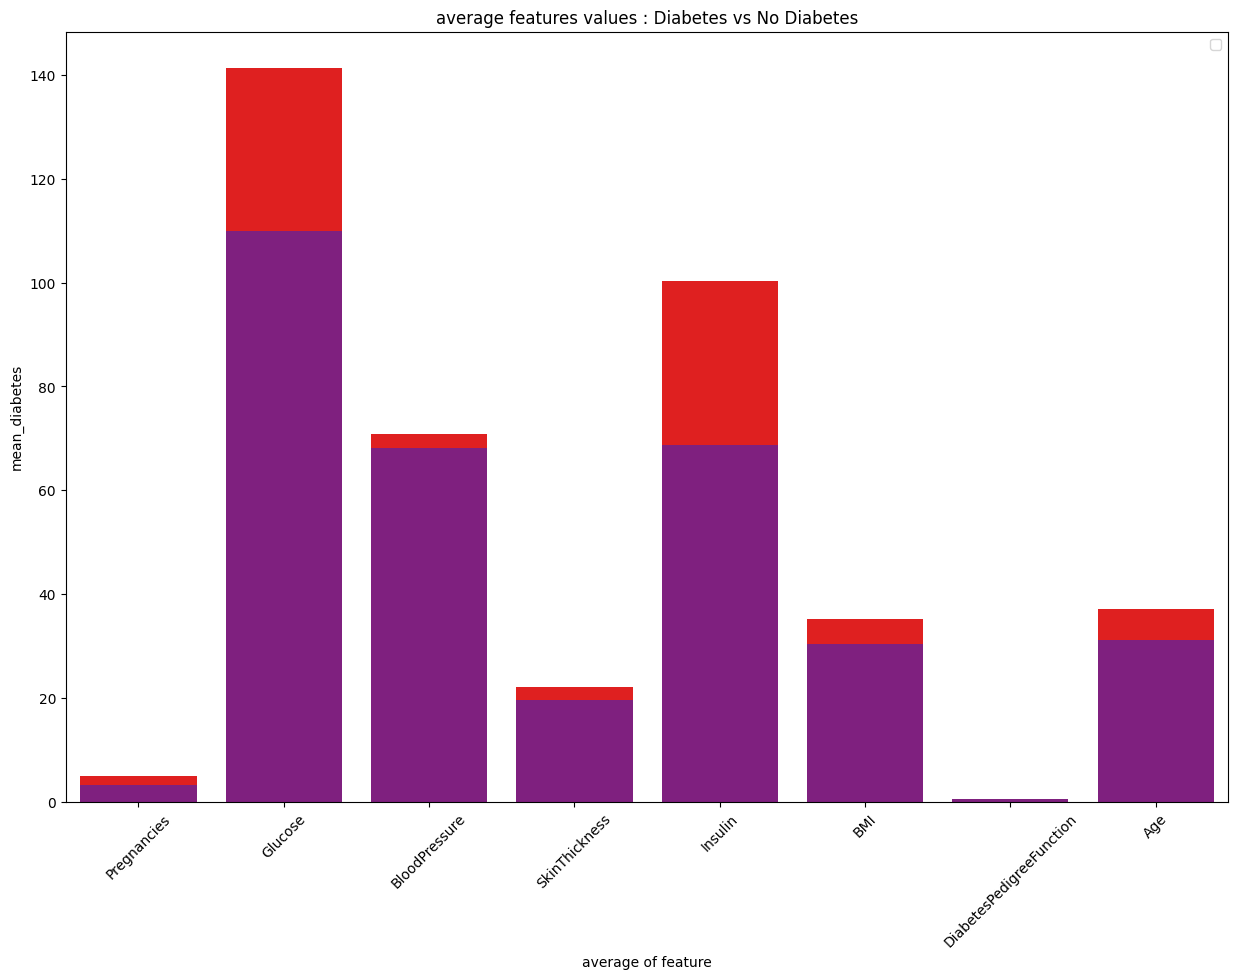

In [227]:
plt.figure(figsize = (15,10))
sns .barplot(x = 'variables', y = 'mean_diabetes',color = 'red' ,data = df_summary)
sns.barplot(x = 'variables', y = 'mean_no_diabetes',color = 'blue', alpha = 0.5 ,data = df_summary)
plt.title("average features values : Diabetes vs No Diabetes")
plt.xlabel("average of feature")
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [228]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [229]:
x  = variables
y = target
print(x)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [230]:
scaler = StandardScaler()


In [231]:
scaler.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [232]:
standardized_data = scaler.transform(x)

In [233]:
print(standardized_data)
x = standardized_data
y  =target

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [234]:
corr = df.corr()


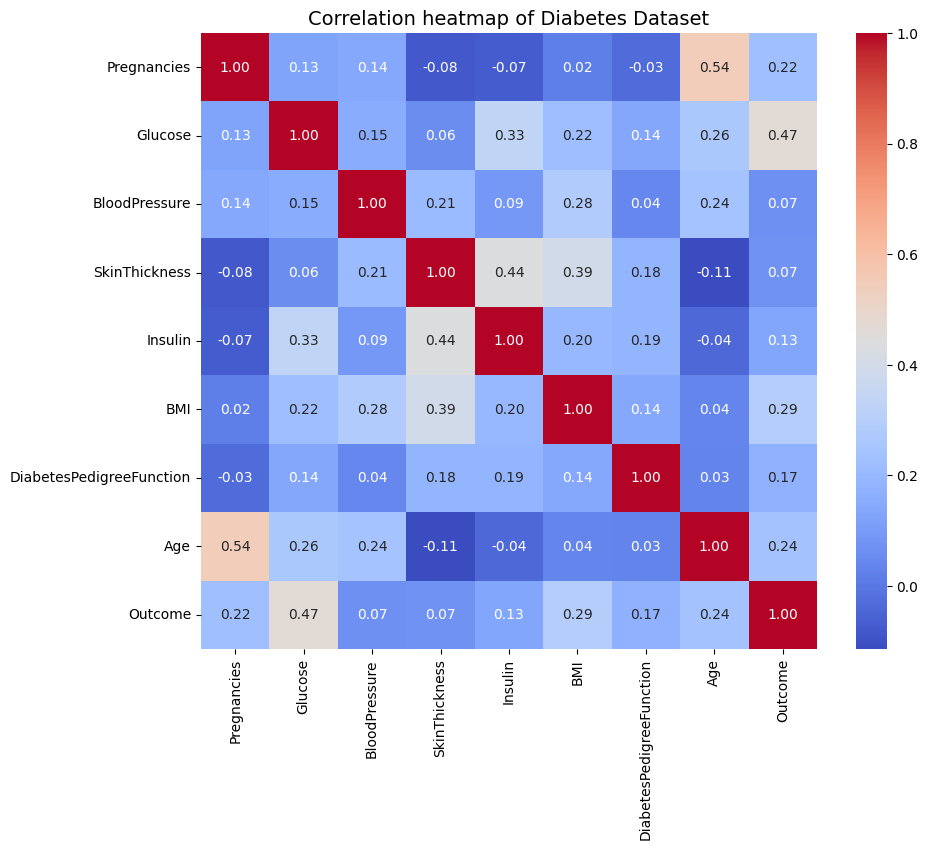

In [235]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f',cbar=True,square=True)
plt.title("Correlation heatmap of Diabetes Dataset", fontsize = 14)
plt.show()

# split dataset

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify= y, random_state=2)

In [237]:
# importing important Liabraries of Model

from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [238]:
svc = SVC(kernel= 'linear',probability= True)
lr = LogisticRegression(solver='liblinear',penalty='l1')
dt  = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=50,random_state=2)
knc  = KNeighborsClassifier()


In [239]:
clfs = {
    'SVC' : svc,
    'LR' : lr,
    'DT' : dt,
    'RF' : rf, 
    'KNC' : knc
}

In [240]:
def train_classifier(clf, x_train, x_test, y_train ,y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [241]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,  x_test,y_train, y_test)

    print("For :", name)
    print("Accuracy : ", current_accuracy)
    print("Precision :", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For : SVC
Accuracy :  0.7727272727272727
Precision : 0.7567567567567568
For : LR
Accuracy :  0.7597402597402597
Precision : 0.717948717948718
For : DT
Accuracy :  0.7727272727272727
Precision : 0.7714285714285715
For : RF
Accuracy :  0.7337662337662337
Precision : 0.6666666666666666
For : KNC
Accuracy :  0.7207792207792207
Precision : 0.6486486486486487


In [242]:
performance_df = pd.DataFrame({'algorithm ':clfs.keys(),'accuracy ': accuracy_scores, 'precision': precision_scores}).sort_values('precision', ascending = False)

In [243]:
performance_df

,algorithm,accuracy,precision
2,DT,0.772727,0.771429
0,SVC,0.772727,0.756757
1,LR,0.759740,0.717949
3,RF,0.733766,0.666667
4,KNC,0.720779,0.648649


#combine models 

In [244]:
from sklearn.ensemble import VotingClassifier


In [245]:
voting_clf = VotingClassifier(
    estimators= [
        ('dt ', clfs['DT']),
        ('svc',clfs['SVC'])
        ],
    voting='soft'
)

In [246]:
voting_clf.fit(x_train,y_train)
y_pred_vote = voting_clf.predict(x_test)

print("\nVoting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print("Precision:", precision_score(y_test, y_pred_vote, zero_division=0))


Voting Classifier Results:
Accuracy: 0.7792207792207793
Precision: 0.7631578947368421


In [248]:
# now we are using Decision tree as our classifier

classifier = DecisionTreeClassifier(max_depth=5)

classifier.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [250]:
user_input = input("Enter items seprated by commas: Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age")

items = [float(x.strip()) for x in user_input.split(",")]

input_data_as_numpy_array = np.asarray(items)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('the person is not diabetic')
else:
    print("the person is diabetic")

[0]
the person is not diabetic


e:\Diabetes predictions\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
